# Matplotlib és a Legkissebb négyzetek módszere

Ahogy a szoftvereszközök bemutatásánál már volt róla szó az adatok vizualizálása nagyon fontos, hisz egy-egy ábráról könyebb adatokat leolvasni, mint nagy táblázatokból vagy egyéb adastruktúrákból. Pythonban a `matplotlib` felel ezeknek az ábráknak a létrehozásához. Nézzük is meg hogyan is kell.

Először vegyünk egy egyszerű példát például bizonyos x értékekhez rendeljünk hozzá f(x)=y értékeket.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x=np.zeros(20)
y=np.zeros(20)

for i in range(-9,10):
    x[i]=i
    y[i]=pow(x[i],2)
    
plot=plt.plot(x,y,"o")


Látható tehát a matplotlib plot hívásásval tudjuk kirajzopltatni az ábráinkat, melynek az első paramátere a értelmezési tartomány, a második az értékkészlet, és további paramáterként meglehet neki adni a jelölés formáját illetve feliratokat a label paraméter segítségével. Az értékeket megadhatjuk függvény segítségével is :

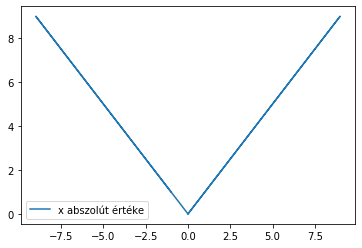

In [64]:
import matplotlib.pyplot as plt
import numpy as np

x=np.zeros(20)
y=np.zeros(20)

for i in range(-9,10):
    x[i]=i
    
plot=plt.plot(x,abs(x),"-", label='x abszolút értéke', markersize=10)
plot = plt.legend()

plt.show(plot)



Megváltoztathatjuk a színét is az adott ábránknak illete több függvényt is ábrázolhatunk egyszerre.

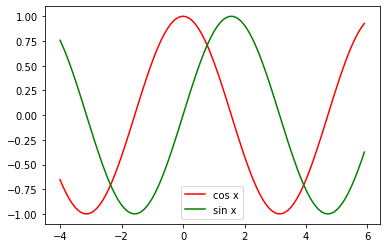

In [102]:
x=np.zeros(100)
d=-4
i=0

while i<100:
    x[i]=d;
    d=d+0.1
    i=i+1

plot=plt.plot(x,np.cos(x),"-r", label='cos x')
plot=plt.plot(x,np.sin(x),"-g", label='sin x')
plot = plt.legend()

plt.show(plot)

A tengelyeket is elnevezhetjük könnyedén a matplotlib ylabel és xlabel metódusaival és adhatunk címet is az ábránknak a title metódussal:

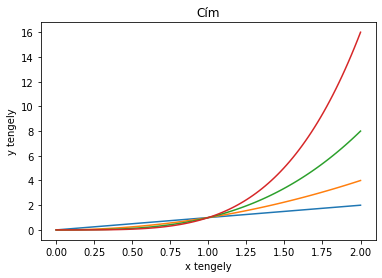

In [6]:
x = np.linspace(0, 2, 100)

plot=plt.plot(x,x)
plot=plt.plot(x,x**2)
plot=plt.plot(x,x**3)
plot=plt.plot(x,x**4)
plt.ylabel('y tengely')
plt.xlabel('x tengely')   
plt.title('Cím')

plt.show(plot)

Az előző példában használtam a `**` operátort ami egy egyszerű módja hogy valamit valamelyik hatványra emeljünk.

A matlotlib segítségével létrehozhatunk hisztogrammokat is  

(0, 6)

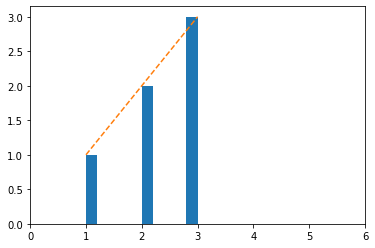

In [5]:
x=np.array([1,2,2,3,3,3])
plot=plt.hist(x)
plot=plt.plot(x,x, '--')
plt.xlim(0,6)



Adatainkat egy ploton belül töbféleképpen is megjeleníthetjük

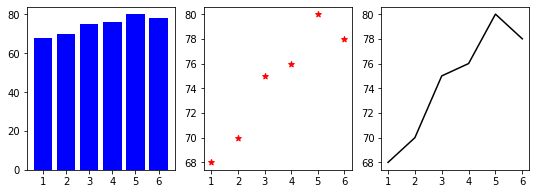

In [161]:
test = ['1', '2', '3', '4', '5', '6']
points = [68, 70, 75, 76, 80, 78]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(test, points, color='b')
plt.subplot(132)
plt.scatter(test, points, marker='*', color='r')
plt.subplot(133)
plt.plot(test, points, color='black')

plt.show()

Ilyen esetben a a jelőlő pontokat a marker, míg a színt a color paraméterrel tudjuk megváltoztatni

## Legkissebb négyzetek módszere

És most, nézzünk meg egy példát a legkissebb négyzetek módszerén, hogy való használatban is lássuk a matplotlib előnyét.

Feladatunk az, hogy kapott mérési eredményekre ráillesszünk egy egyenest. Adottak az értékek ez egy $y \in R^n$ és a hozzájuk tartozó helyek $x\in R^n $, és ezek alapján keressük a $y= a_0+a_1x$ egyenest melyre a $\sum_{i=0}^N[y_i-(a_0+a_1x_i)]^2 $ minimális. Szerencsénkre erre is tartalmaz beépített metódust a `NumPy`. A ` linalg` csomagban található `lstsq` metódus megadja az egyenest amire szükségünk van.

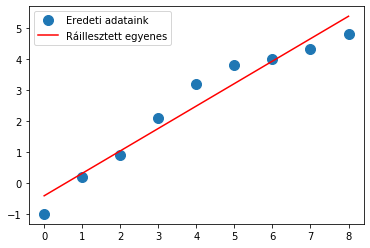

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])

y = np.array([-1, 0.2, 0.9, 2.1, 3.2, 3.8, 4.0, 4.3, 4.8])

a=np.vstack([x, np.ones(len(x))]).T

m, c = np.linalg.lstsq(a, y, rcond=None)[0]

plot = plt.plot(x, y, 'o', label='Eredeti adataink', markersize=10)
plot = plt.plot(x, m*x + c, 'r', label='Ráillesztett egyenes')
plot = plt.legend()

plt.show(plot)


